# Загрузка данных и подготовка их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`.;
- заказы: `/datasets/orders_info_short.csv`.;
- расходы: `/datasets/costs_info_short.csv`. .

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# подключениe модулей
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# импорт датасетов во фреймы
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

## Предварительная проверка фреймов

In [3]:
# проверки на пустоты и дубликаты
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [4]:
visits.duplicated().sum()
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [6]:
orders.duplicated().sum()
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [7]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [8]:
costs.duplicated().sum()
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


## Проверка на типы данных

In [9]:
# функция вывода столбцов для наглядности
def descr(df):
    
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'значения', 1: 'тип данных', 2: 'кол-во уник значений'}, axis=1)

In [10]:
descr(visits)

,значения,тип данных,кол-во уник значений
User Id,"[981449118918, 278965908054, 590706206550, 326...",int64,150008
Region,"[United States, UK, France, Germany]",object,4
Device,"[iPhone, Mac, Android, PC]",object,4
Channel,"[organic, TipTop, RocketSuperAds, YRabbit, Fac...",object,11
Session Start,"[2019-05-01 02:36:01, 2019-05-01 04:46:31, 201...",object,306813
Session End,"[2019-05-01 02:45:01, 2019-05-01 04:47:35, 201...",object,306793


Во фрейме 6 столбцов, один столбец в формате int64, прочие - в obj

Описание столбцов:
User Id - уникальный номер пользователя
Region - регион пользователя
Device - тип устройства и/или ОС
Channel - источник привлечения
Session Start - время начала сессии
Session End - время окончания сессии

In [11]:
descr(orders)

,значения,тип данных,кол-во уник значений
User Id,"[188246423999, 174361394180, 529610067795, 319...",int64,8881
Revenue,"[4.99, 5.99, 9.99, 49.99, 19.99]",float64,5
Event Dt,"[2019-05-01 23:09:52, 2019-05-01 12:24:04, 201...",object,40163


Во фрейме 3 столбца, форматы int64, float64, obj

Описания столбцов:
User Id - уникальный номер пользователя
Revenue - значимость пользователя (в виде дохода)
Event Dt - время покупки

In [12]:
descr(costs)

,значения,тип данных,кол-во уник значений
costs,"[113.3, 78.10000000000001, 85.80000000000001, ...",float64,608
dt,"[2019-05-01, 2019-05-02, 2019-05-03, 2019-05-0...",object,180
Channel,"[FaceBoom, MediaTornado, RocketSuperAds, TipTo...",object,10


Во фрейме 3 столбца, форматы float64, obj

Описания столбцов:
costs - итоговая цена покупки
dt - время покупки
Channel - источник привлечения клиента

## Преобразование имён столбцов

In [13]:
# приведение имен столбцов к snake_case
for i in [visits, orders, costs]:
    i.columns = [x.lower().replace(' ', '_') for x in i.columns.values]

## Преобразование данных о времени

In [14]:
# преобразование obj в datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [15]:
#функция для создания профилей пользователей
def get_profiles(sessions, orders, costs):
    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'session_start'])
                .groupby('user_id')
                .agg(
                    {
                        'session_start' : 'first',
                        'channel' : 'first',
                        'device' : 'first',
                        'region' : 'first'
                    }
                )
                .rename(columns={'session_start' : 'first_ts'})
                .reset_index()
               )
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # добавляем признак пользователей, совершивших покупку
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

In [16]:
#функция для для подсчёта Retention Rate
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw  = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:
#функция для  для подсчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [18]:
#функция для подсчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [19]:
#Функция для сглаживания данных
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [20]:
#Функция для построения графика Retention Rate
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [21]:
#Функция plot_conversion() — для построения графика конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [22]:
#Функция plot_ltv_roi — для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

## Профили пользователей

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [23]:
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5))

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [24]:
print(f'Минимальная дата привлечения {profiles.first_ts.min()}, и максимальная дата {profiles.first_ts.max()}')

Минимальная дата привлечения 2019-05-01 00:00:41, и максимальная дата 2019-10-27 23:59:04


### Географическое и платёжное распределение

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [25]:
print(profiles['region'].unique())

['United States' 'France' 'Germany' 'UK']


In [26]:
#таблица платёжеспособности
regional_users = (
    profiles.groupby('region')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('region')['user_id'].nunique().reset_index(), 
           on = 'region', how = 'left')
)
regional_users.set_axis(['region', 'total_users', 'payers'], axis='columns', inplace=True)
regional_users['payer_rate'] = regional_users.payers / regional_users.total_users
display(regional_users.sort_values(by='payer_rate', ascending=False))

,region,total_users,payers,payer_rate
3,United States,100002,6902,0.069019
1,Germany,14981,616,0.041119
2,UK,17575,700,0.039829
0,France,17450,663,0.037994


Наиболее лакомым сегментов является США, они же дают большую часть платящих.

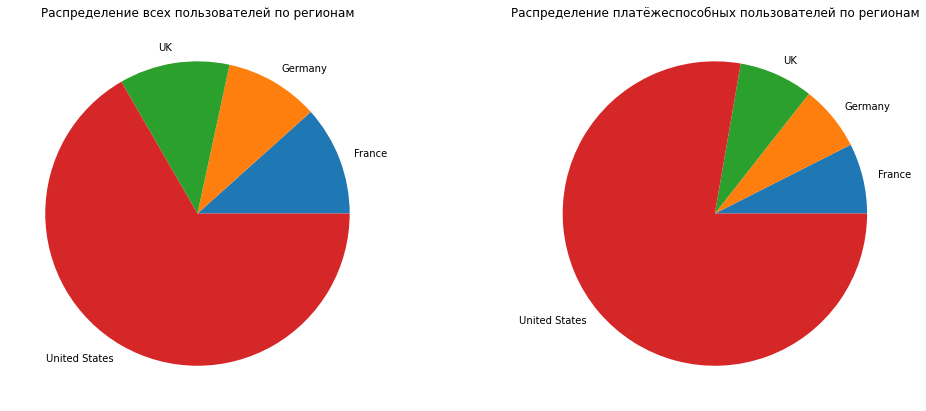

In [27]:
#визуализация таблицы платёжеспособности
fig, ax = plt.subplots(1, 2, figsize = (17, 7),  squeeze=False)
ax[0][1].pie(regional_users.payers, labels=regional_users.region)
ax[0][1].set(title='Распределение платёжеспособных пользователей по регионам')
ax[0][0].pie(regional_users.total_users, labels=regional_users.region)
ax[0][0].set(title='Распределение всех пользователей по регионам')
plt.show()

### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [28]:
#V1 
# структура фрейма профилей пользователей
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [29]:
# таблица предпочтений устройств
device_users = (
    profiles.groupby('device')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('device')['user_id'].nunique().reset_index(), 
           on = 'device', how = 'left')
)
device_users.set_axis(['device', 'total_users', 'payers'], axis='columns', inplace=True)
device_users['payer_rate'] = device_users.payers / device_users.total_users
display(device_users.sort_values(by='payer_rate', ascending=False))

,device,total_users,payers,payer_rate
1,Mac,30042,1912,0.063644
3,iPhone,54479,3382,0.062079
0,Android,35032,2050,0.058518
2,PC,30455,1537,0.050468


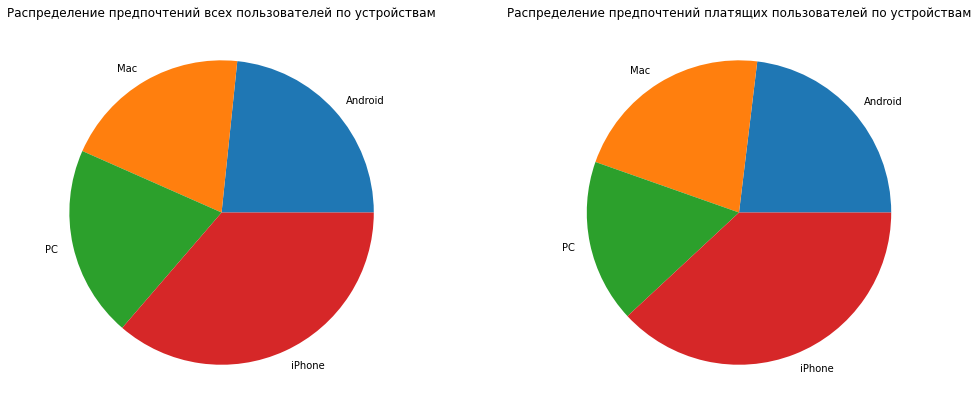

In [30]:
# визуализация таблицы предпочтений устройств
fig, ax = plt.subplots(1, 2, figsize = (17, 7),  squeeze=False)
ax[0][1].pie(device_users.payers, labels=device_users.device)
ax[0][1].set(title='Распределение предпочтений платящих пользователей по устройствам')
ax[0][0].pie(device_users.total_users, labels=device_users.device)
ax[0][0].set(title='Распределение предпочтений всех пользователей по устройствам')
plt.show()

Наибольшую часть сегмента подмяли под себя "яблочники" - IPhone\Mac, фактически, одна и та же "экологическая ниша", с незначительным отличиями по "железу".

### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [31]:
# таблица приоритетных каналов привлечения
advert_users = (
    profiles.groupby('channel')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('channel')['user_id'].nunique().reset_index(), 
           on = 'channel', how = 'left')
)
advert_users.set_axis(['channel', 'total_users', 'payers'], axis='columns', inplace=True)
advert_users['payer_rate'] = advert_users.payers / advert_users.total_users
display(advert_users.sort_values(by='payer_rate', ascending=False))

,channel,total_users,payers,payer_rate
1,FaceBoom,29144,3557,0.122049
0,AdNonSense,3880,440,0.113402
9,lambdaMediaAds,2149,225,0.104700
6,TipTop,19561,1878,0.096007
5,RocketSuperAds,4448,352,0.079137
7,WahooNetBanner,8553,453,0.052964
8,YRabbit,4312,165,0.038265
3,MediaTornado,4364,156,0.035747
2,LeapBob,8553,262,0.030633
4,OppleCreativeMedia,8605,233,0.027077


FB сидит в лидерах по количеству пользователей и платящих тоже, ТТ, несмотря на второе место по количеству, по платящим лишь на 4 месте, т.е. является кандидатом на пристальное рассмотрение, и возможно, даже на выбывание.

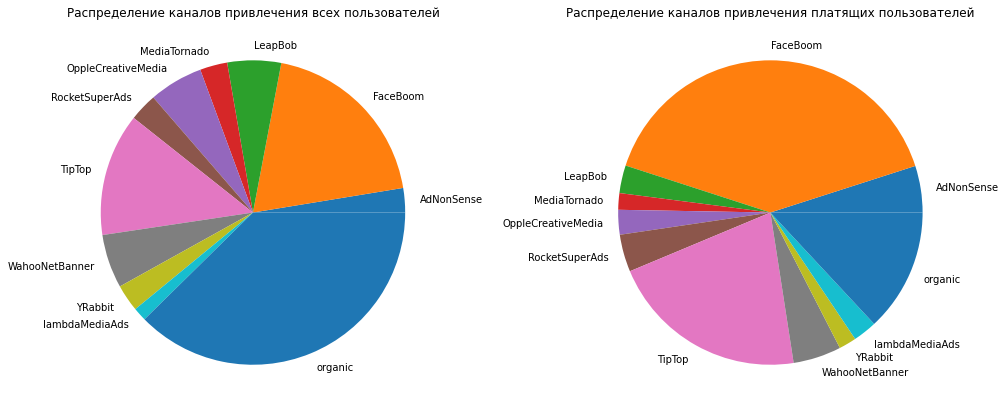

In [32]:
# визуализация таблицы приоритетных каналов привлечения
fig, ax = plt.subplots(1, 2, figsize = (17, 7),  squeeze=False)
ax[0][1].pie(advert_users.payers, labels=advert_users.channel)
ax[0][1].set(title='Распределение каналов привлечения платящих пользователей')
ax[0][0].pie(advert_users.total_users, labels=advert_users.channel)
ax[0][0].set(title='Распределение каналов привлечения всех пользователей')
plt.show()

FB даёт самый большой поток клиентов, AdNonSense примерно на 10% поменьше.

# Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

## Посчитаем общую сумму расходов на маркетинг

In [33]:
costs['costs'].sum()

105497.30000000002

### Опеределим, сколько денег ушло на каждый источник

In [34]:
costs.groupby('channel')['costs'].sum().sort_values(ascending=False).reset_index()

,channel,costs
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


TipTop и FaceBoom - лидеры по проеданию бюджета, в 10 и более раз превосходя иные каналы.

In [35]:
advert_users.query('channel != "organic"')[['channel', 'payers']].sort_values(by='payers', ascending=False)

,channel,payers
1,FaceBoom,3557
6,TipTop,1878
7,WahooNetBanner,453
0,AdNonSense,440
5,RocketSuperAds,352
2,LeapBob,262
4,OppleCreativeMedia,233
9,lambdaMediaAds,225
8,YRabbit,165
3,MediaTornado,156


Они же - лидеры по привлечению пользователей, но только в абсолютных значениях.

## Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику, затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику

### Сперва нужно сгруппировать данные по неделям и месяцам

In [36]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [37]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [38]:
costs['week'] = costs['dt'].dt.isocalendar().week

In [39]:
costs['month'] = costs['dt'].dt.month

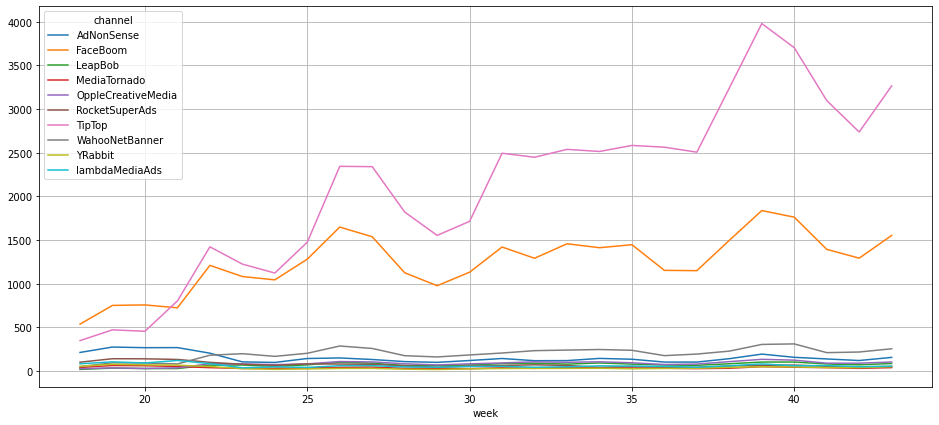

In [40]:
# Построим недельный график:
costs.pivot_table(
    index='week',  # номера недель
    columns='channel',  # источники переходов
    values='costs',  # затраты
    aggfunc='sum'  # сложение затрат
).plot(figsize=(16, 7), grid=True)
plt.show()

Как видно, сильно выбиваются FaceBoom и TipTop, и если у первого после 25 недели затраты стабилизируются, то у второго затраты растут до самого конца рассматриваемого периода.

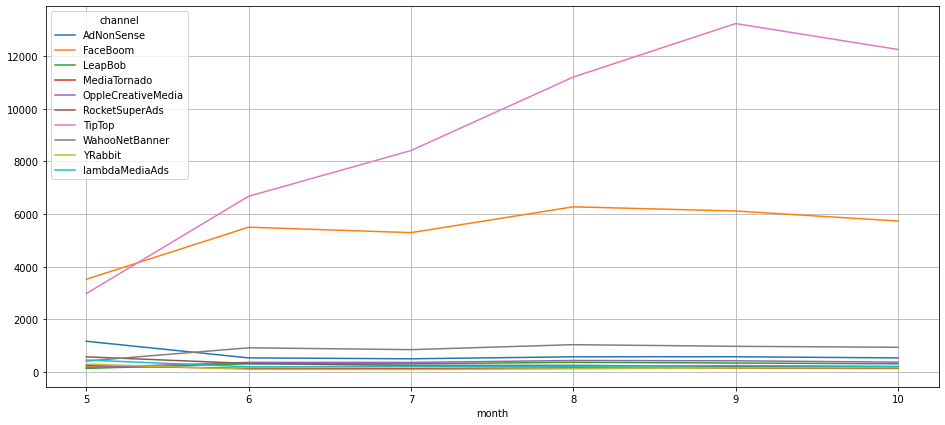

In [41]:
# Построим месячный график:
costs.pivot_table(
    index='month',  # номера месяцев
    columns='channel',  # источники переходов
    values='costs',  # затраты
    aggfunc='sum'  # сложение затрат
).plot(figsize=(16, 7), grid=True)
plt.show()

Здесь так же сильно выбиваются TipTop и FaceBoom, и наблюдается аналогичная картина - второй стабилизаруется после 6 месяца, а первый неуклонно растёт, только к самому концу переходя на лёгкое снижение.

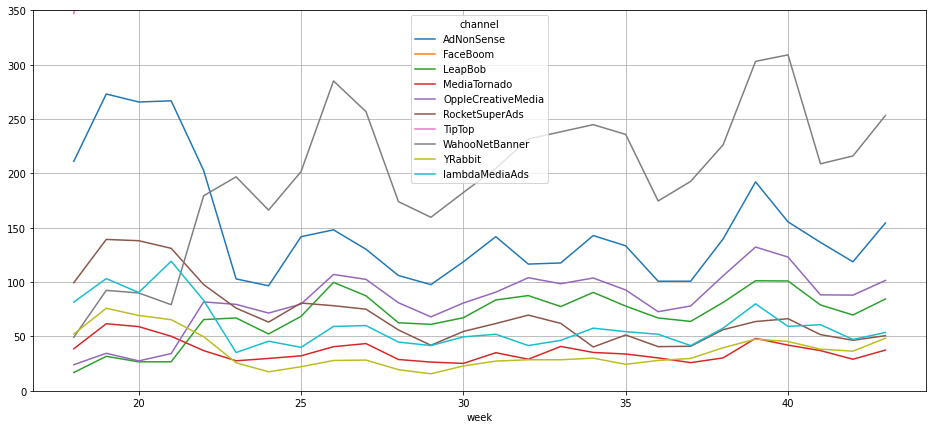

In [42]:
#V1 недельный график без двух выдающихся каналов
costs.pivot_table(
    index='week',  # номера недель
    columns='channel',  # источники переходов
    values='costs',  # затраты
    aggfunc='sum'  # сложение затрат
).plot(figsize=(16, 7), grid=True)
plt.ylim(0,350)
plt.show()

Как видно, затраты на прочие каналы находятся на уровне пачки сухариков, только WаhooNetBanner имеет слабую тенденцию к росту.

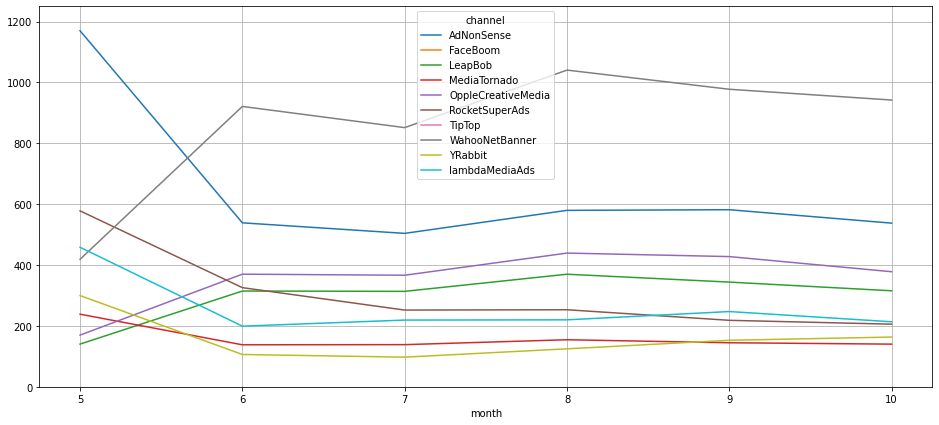

In [43]:
#V1
#месячный график без двух выдающихся каналов
costs.pivot_table(
    index='month',  # номера месяцев
    columns='channel',  # источники переходов
    values='costs',  # затраты
    aggfunc='sum'  # сложение затрат
).plot(figsize=(16, 7), grid=True)
plt.ylim(0,1250)
plt.show()

На длительном периоде ВСЕ каналы стремятся к снижению вложений, при том затраты на тот же LeapBob меньше затрат на Faceboom в ТРИДЦАТЬ!!! раз!

# Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [44]:
# зададим точку отсчёта и глубину рассмотрения
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

## Проанализируем окупаемость рекламы

In [45]:
#V1 отфильтровывание канала organic
profiles_no = profiles.query('channel != "organic"')

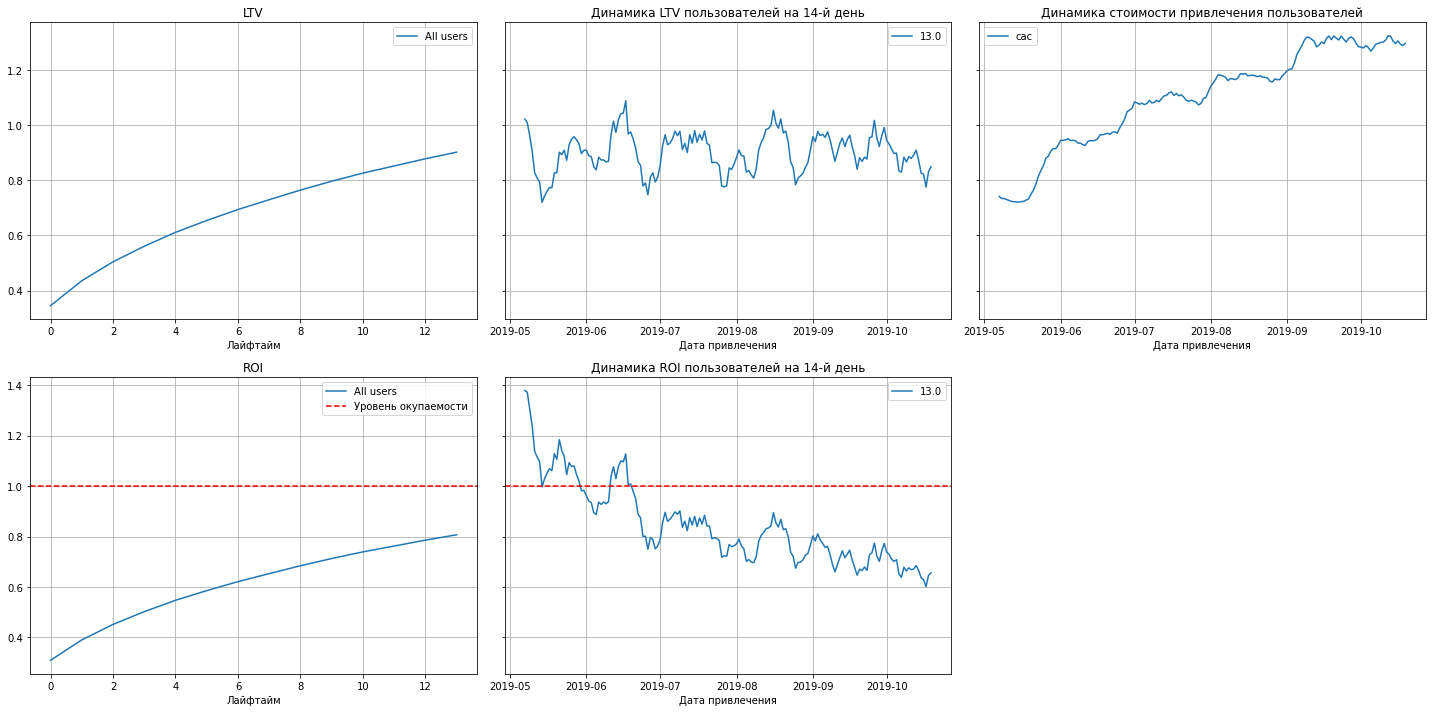

In [46]:
#V1
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_no, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Предварительные выводы:

реклама не окупается;
САС растет, что свидетельствует об увеличении рекламного бюджета, и выходит на плато после 4-х месяцев;
примерно с июня привлеченные клиенты перестают окупаться.

## Проверим конверсию пользователей и удержание в динамике  по каналам 

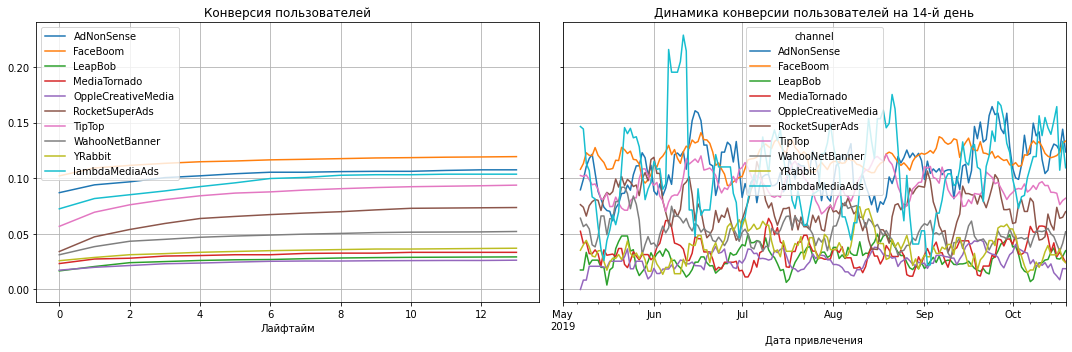

In [47]:
#V1
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

FaceBoom и AdNonSense дают наибольшую конверсию, динамика у любого из каналов не имеет выраженного тренда

## Проверим конверсию пользователей и удержание в динамике по странам

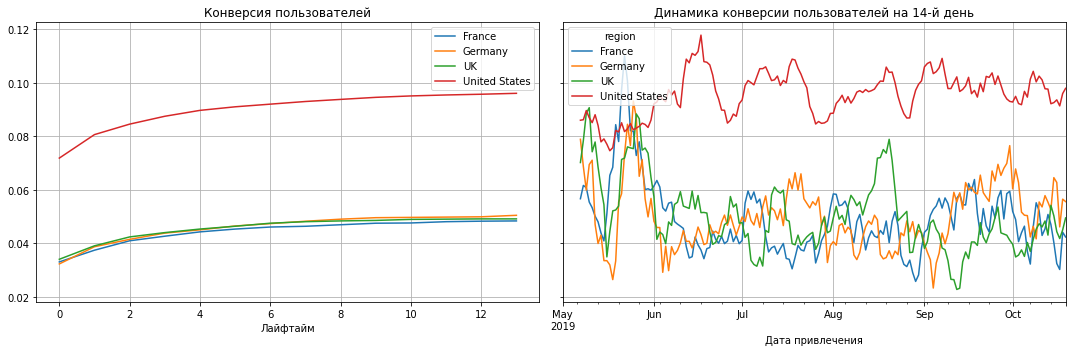

In [48]:
#V1
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия США выше, чем прочих стран, динамика конверсии США имеет слабую тенденцию к росту, в то время как прочие страны после первоначального всплеска интереса затухают.

## Проверим конверсию пользователей и удержание в динамике по устройствам

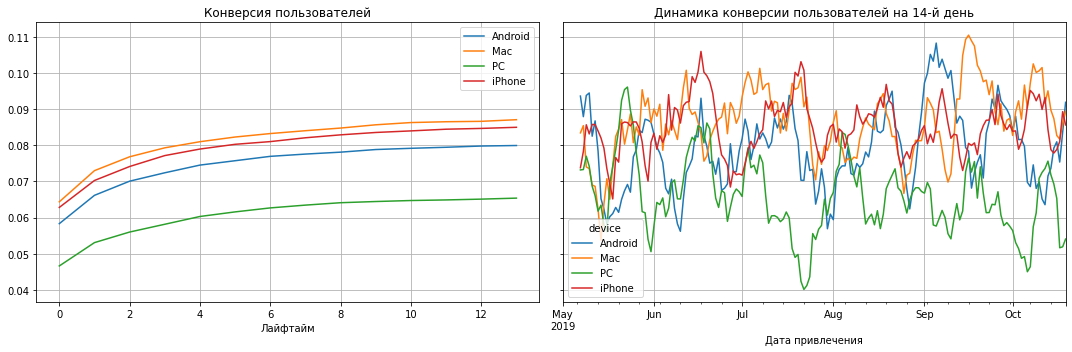

In [49]:
#V1
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

*V1

Среди устройств в лидерах экосистема "Эппл", и в целом их конверсия лидирует, в аутсайдерах - платформа РС.

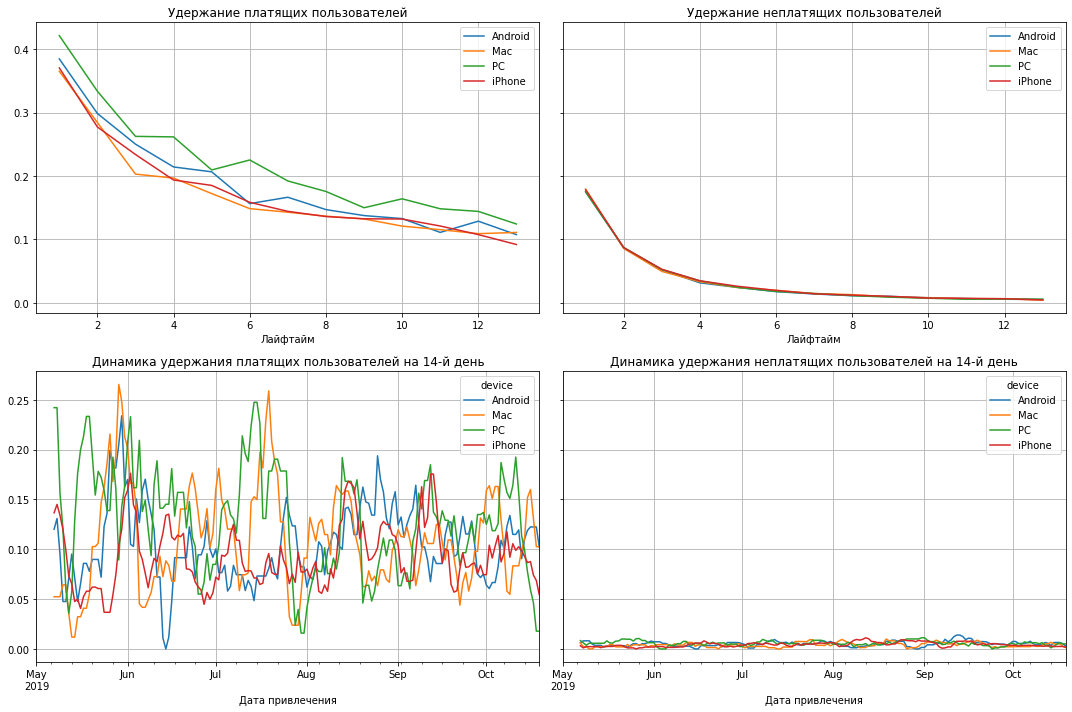

In [50]:
#V1
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Хуже всего из платящих удерживаются пользователи из FaceBoom и AdNonSense, у неплатящих картина одинакова для всех каналов.

Вся динамика удержания представляет существует без каких-либо тенденций. Пока непонятно - это итог плохо сформированной маркетинговой кампании или что-то ещё...

## Проанализируем окупаемость рекламы с разбивкой по устройствам

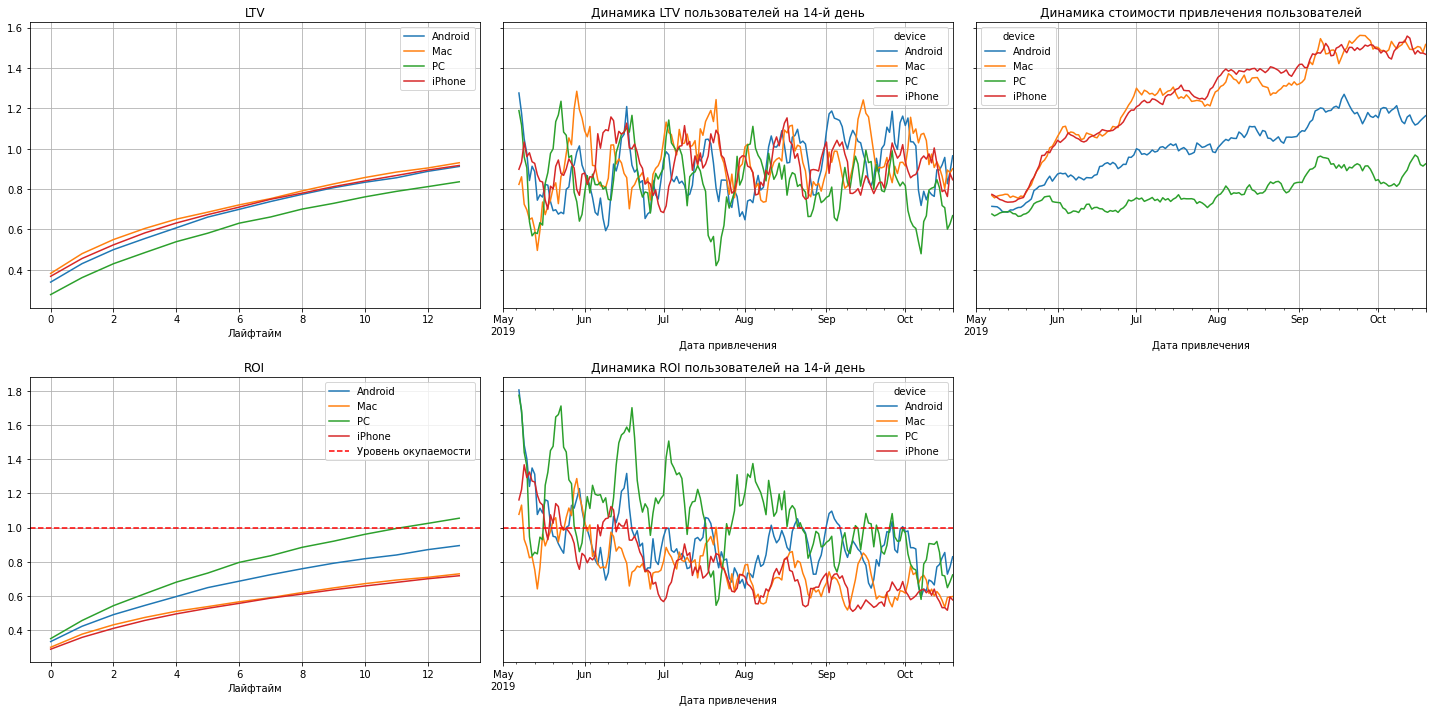

In [51]:
#V1
# LTV & ROI с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_no, orders, observation_date, horizon_days, 
                                                                      dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Наибольшим абсолютным LTV обладает Iphone, но его преимущество исчезающе мало. Динамика не превышает средней, а стоимость привлечения стабильно растёт.
Наибольшую окупаемость демонстрирует РС, но в динамике она тоже падает и балансирует на границе безубыточности.

## Проанализируем окупаемость с разбивкой по странам

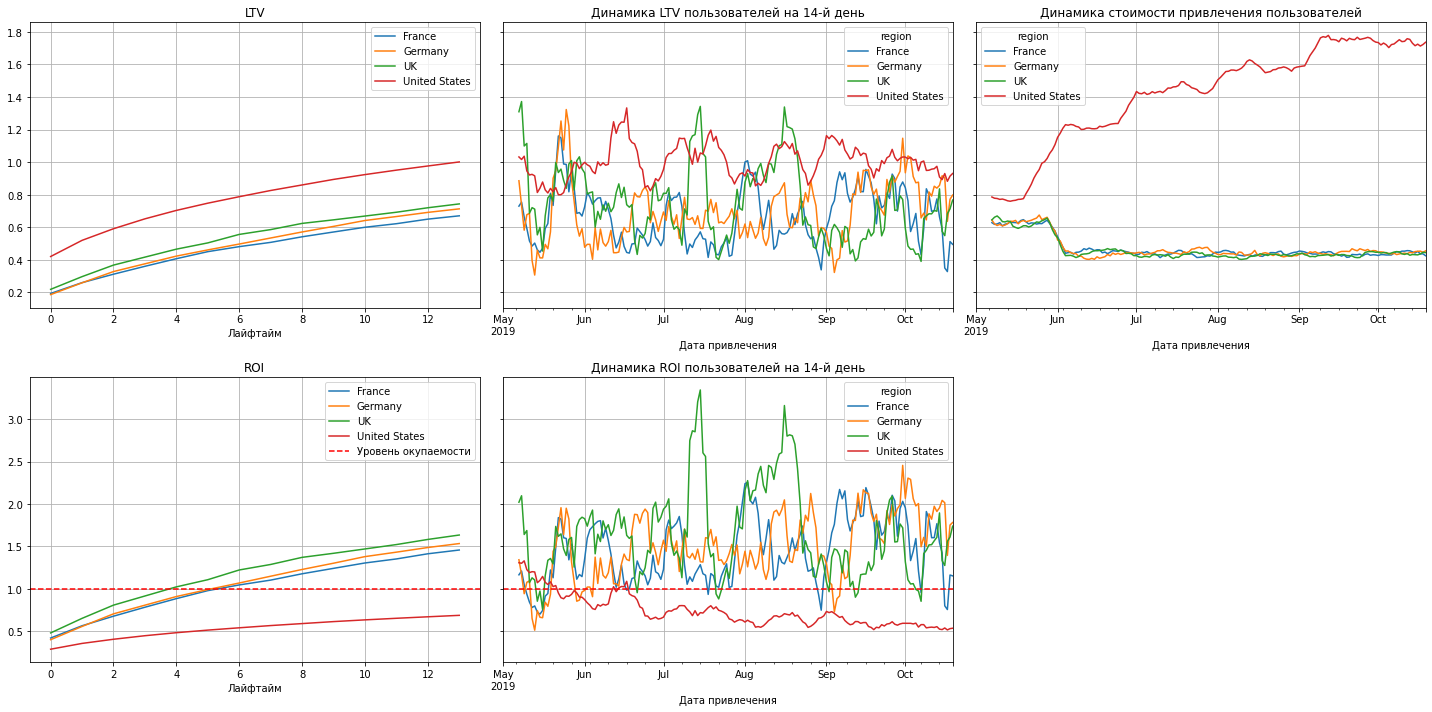

In [52]:
#V1
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_no, orders, observation_date, horizon_days, 
                                                                      dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Наибольшим чистым LTV обладает США, но она же имеет самую высоку динамику привлечения, из-за чего пребывает ниже границ рентабельности, а бал правит Европа с лидером в виде Англии.

## Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

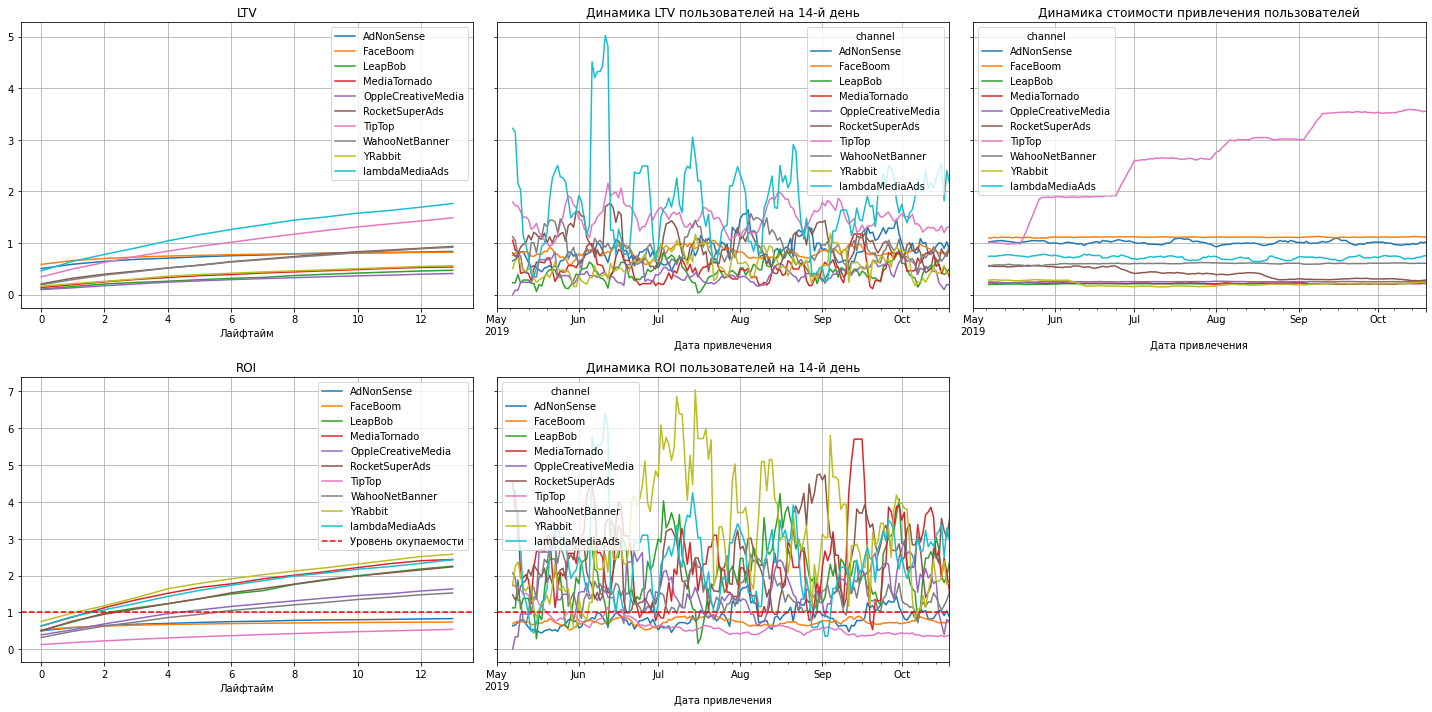

In [53]:
#V1
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_no, orders, observation_date, horizon_days, 
                                                                      dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По чистому LTV наиболее значимыми являются каналы ANS и TT, при этом у последнего динамика стоимости привлечения стабильно растёт, а по рентабельности оба этих канала находятся ниже границы окупаемости.

### Промежуточные выводы:

1. Реклама в целом не окупается;
2. Наибольшее влияние на убыточность всей кампании влияет сегмент TipTop, транслируемый на IPhone\Mac в США;
3. Проблемы окупаемости вызваны неверным выбором целевой аудитории.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Были использованы данные, предоставленные компанией-заказчиком, в период с 1 мая по 27 октября 2019 года, как то: логи сервера с данными об их посещениях, выгрузку покупок за этот период, затраты на рекламу
.
В результате исследования было выявлено, что основной причиной финансовых проблем являются рекламные траты на привлечение пользователей посредством FaceBoom и TipTop в США:

высокая стоимость привлечения у этих каналов, и с горизонтом событий в две недели она не окупается;

при этом, платящие пользователи FaceBoom и AdNonSence очень плохо удерживаются;

расходы на привлечение в TipTop за полгода выросли почти в три раза.

Причины неэффективности кроются в отсутствии раздельного подхода к покупателям из двух различных регионов - США и Европы.
Для США приоритетным устройством являются IPhone\Mac, приоритетными каналами - ANS \ FB.

Так как наибольшее влияние на убыточность всей кампании влияет сегмент TipTop, транслируемый на IPhone\Mac в США, то требуется пересмотреть основные параметры кампании: 

1. Для сегмента США сделать смещение на другие каналы вместо ANS \ TT \ FB;
2. Вместо платформы IPhone\Mac сконцентрироваться на РС и, в меньше степени, на Android;
3. Так как затраты на рекламу ТТ в США стабильно и постоянно растут при падении окупаемости, то необходимо понять причины роста САС, при необходимости сократить продолжительность рекламной кампании или поменять условия контракта, либо полностью прекратить продвижение по этому каналу.
4. Выделить отдельное направление для повышения конверсии orgnic-клиентов: несмотря на то, что они заведомо превышают по количеству любой источник, количество платящих среди них самое низкое, при этом данная группа обладает нулевыми затратами на привлечение, что позволяет выделить больше средств именно на конверсию, в отличие от структуры расходов на прочие каналы привлечения.

П.С. Рекламной кампании не хватает гибкости по всем критериям:
по строкам - надо использовать меньшие временные промежутки и чаще пересматривать метрики;
по регионам - США \ Европа требуют разных подходов;
по устройствам - необходимо делить их ан группы, как минимум - "Эппл" \ не "Эппл".
по каналам - как минимум, нужны два разных подхода для organic \ non-organic сегментов в плане бюджетирования.